Joint density 

In [12]:
import numpy as np
from scipy.stats import multivariate_normal as mvn, norm

dist= mvn( mean=[1,4], cov=[[9,3],[3,4]] )

xlim = (-10,10)
ylim = (-12,12)
  
x = np.linspace(*xlim,100) #asterisk 'unpacks' the tuple
y = np.linspace(*ylim,100)

X, Y = np.meshgrid(x,y)
pos = np.dstack( (X,Y) )
Z = dist.pdf(pos)

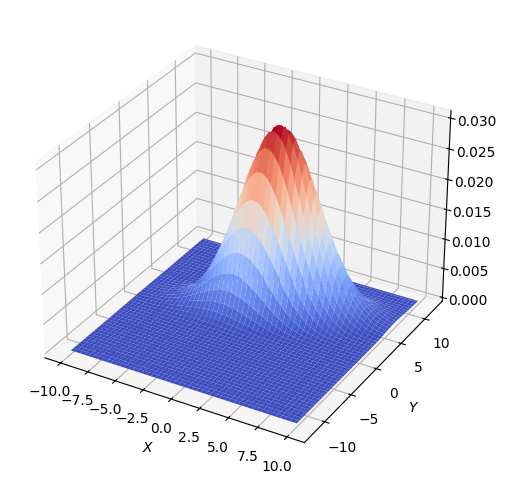

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
_ = ax.plot_surface(X, Y, dist.pdf(pos), cmap='coolwarm' )


Marginals (easy to read off the distributions for normals) and Conditionals (fix one parameter, then renormalise)

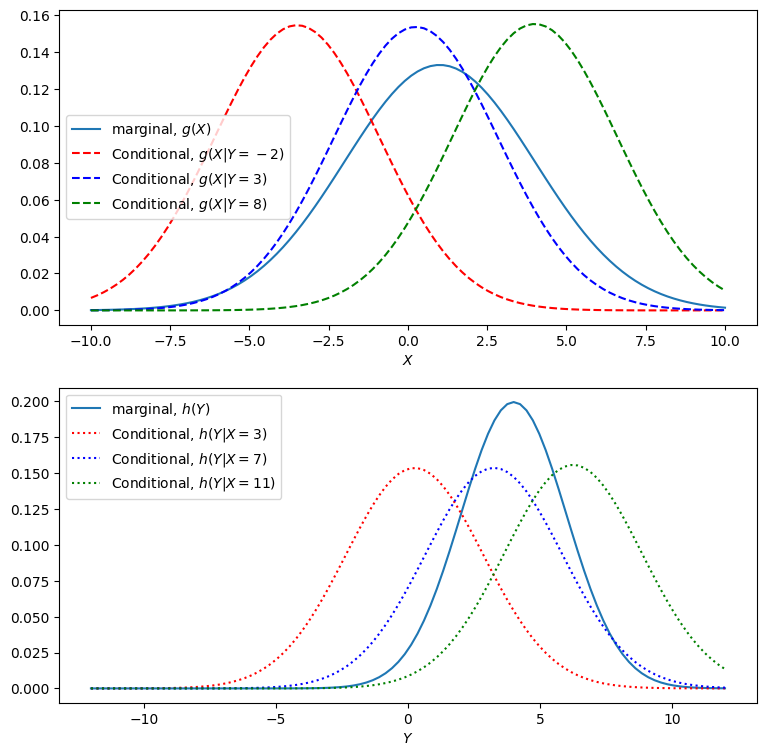

In [46]:
fig, ax = plt.subplots(2,1, figsize=(9, 9))

#draw the marginal
ax[0].plot(x, norm.pdf(x,1,3), label='marginal, $g(X)$')
ax[0].set_xlabel('$X$')

# add some conditionals
for yc, col in zip([-2,3,8], ['r','b','g']):
    ys = np.full_like(x, yc) #creates an array of yc with same shape as x
    yv = dist.pdf( np.dstack((x,ys)) ) #computes joint dist for yc, i.e. f(x,yc) 
    # Normalize the distribution
    normalization_factor = np.trapz(yv, x)
    yv /= normalization_factor
    ax[0].plot( x, yv, c=col, ls='--', label=f'Conditional, $g(X|Y={yc})$' )

ax[0].legend()

#draw the marginal
ax[1].plot(y, norm.pdf(y,4,2), label='marginal, $h(Y)$')
ax[1].set_xlabel('$Y$')

# add some conditionals
for xc, col in zip( [3,7,11], ['r','b','g']):
    xs = np.full_like(y, xc)
    xv = dist.pdf( np.dstack((y, xs)) )
    normalization_factor = np.trapz(xv, y)
    xv /= normalization_factor
    ax[1].plot( y, xv, c=col, ls=':', label=f'Conditional, $h(Y|X={xc})$' )

ax[1].legend()

